# Brynjar

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from sklearn.linear_model import LinearRegression

In [221]:
# Coordinates for NFL teams
stadium_coordinates = pd.read_csv("DatasetNew/NFL_stadium_coordinates.csv")

# Attendance at each game from 2000 to 2019
game_attendance = pd.read_csv("DatasetNew/NFL_Attendance_2000_2019.csv")

# Information about each game from 1999 to 2023
games = pd.read_csv("DatasetNew/games.csv")

In [222]:
# Dictionary to map team names to abbreviations
team_abbr = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'OAK',
    'Chargers': 'LAC',
    'Rams': 'LA',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Redskins': 'WAS'
}

# Extract the last name from team names
game_attendance['last_name'] = game_attendance['team_name'].apply(lambda x: x.split()[-1])

# Map team names to abbreviations
team_abbr_map = {team: team_abbr[team] for team in game_attendance['last_name'].unique()}

# Create a new column with abbreviations
game_attendance['team_abbr'] = game_attendance['last_name'].map(team_abbr_map)



In [223]:
stadium_coordinates["Team"] = stadium_coordinates["Team"].replace('Forty-Niners', '49ers')

stadium_coordinates['team_abbr'] = stadium_coordinates['Team'].map(team_abbr)

In [224]:
games["gameday"] = pd.to_datetime(games['gameday'])
games['year'] = games['gameday'].dt.year


# Filter games for the years 2000 to 2019
game_score_filtered = games[(games['year'] >= 2000) & (games['year'] <= 2019)]

# Filter game_attendance for the years 2000 to 2019
team_data_filtered = game_attendance[(game_attendance['year'] >= 2000) & (game_attendance['year'] <= 2019)]

# Convert 'week' column to int type for consistency
game_score_filtered['week'] = game_score_filtered['week'].astype(int)

# Merge the filtered datasets on team abbreviation, week, and year
merged_data = pd.merge(game_score_filtered, team_data_filtered, left_on=['home_team', 'week', 'year'], right_on=['team_abbr', 'week', 'year'], how='inner')

# Merge the stadium coordinates
final_data = pd.merge(merged_data, stadium_coordinates, left_on=['team_abbr'], right_on=["team_abbr"], how='inner')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\630689048.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
stadium_coordinates

,Team,Conference,latitude,longitude,zip,pic,Unnamed: 6,team_abbr
0,Titans,AFC,36.166461,-86.771289,37213,y,g,TEN
1,Giants,NFC,40.812194,-74.076983,10021,y,NaN,NYG
2,Steelers,AFC,40.446786,-80.015761,15202,y,NaN,PIT
3,Panthers,NFC,35.225808,-80.852861,28202,y,g,CAR
4,Ravens,AFC,39.277969,-76.622767,21203,y,g,BAL
5,Buccaneers,NFC,27.975967,-82.503350,33607,y,g,TB
6,Colts,AFC,39.760056,-86.163806,46201,y,NaN,IND
7,Vikings,NFC,44.973881,-93.258094,56760,y,NaN,MIN
8,Cardinals,NFC,33.527700,-112.262608,63102,y,NaN,ARI
9,Cowboys,NFC,32.747778,-97.092778,75203,y,NaN,DAL


In [226]:
result = final_data[["game_id","season","week","gameday","weekday","home_team","away_team","home_score","away_score","stadium", "team","team_name","weekly_attendance","last_name","team_abbr","Team","longitude","latitude", "away_qb_name", "home_qb_name", "away_coach", "home_coach"]]

In [227]:
result.nunique()

game_id              4855
season                 21
week                   17
gameday               853
weekday                 7
home_team              32
away_team              34
home_score             59
away_score             54
stadium                84
team                   30
team_name              32
weekly_attendance    3803
last_name              32
team_abbr              32
Team                   32
longitude              31
latitude               31
away_qb_name          251
home_qb_name          240
away_coach            138
home_coach            133
dtype: int64

In [228]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Create a new column 'home_team_win'
result['home_team_win'] = result['home_team'] == result['winning_team']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3983529507.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3983529507.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
# Convert 'season' column to datetime format
result['season'] = pd.to_datetime(result['season'], format='%Y')
# Extract the year component
result['season'] = result['season'].dt.year

# Filter out rows where 'season' column equals 1999
result = result[result['season'] != 1999]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3092826610.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3092826610.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [230]:
# SD and LAC THE SAME team
team_mapping = {
    'SD': 'LAC',
    # Add other mappings as necessary
}

In [231]:
# STL Land LA THE SAME team
team_mapping2 = {
    'STL': 'LA',
    # Add other mappings as necessary
}

In [232]:
result['home_team'] = result['home_team'].replace(team_mapping)
result['away_team'] = result['away_team'].replace(team_mapping)


In [233]:
result['home_team'] = result['home_team'].replace(team_mapping2)
result['away_team'] = result['away_team'].replace(team_mapping2)


In [234]:
result['team_abbr'] = result['team_abbr'].replace(team_mapping)
result['team_abbr'] = result['team_abbr'].replace(team_mapping2)

In [235]:
result.isna().sum()

game_id              0
season               0
week                 0
gameday              0
weekday              0
home_team            0
away_team            0
home_score           0
away_score           0
stadium              0
team                 0
team_name            0
weekly_attendance    0
last_name            0
team_abbr            0
Team                 0
longitude            0
latitude             0
away_qb_name         0
home_qb_name         0
away_coach           0
home_coach           0
winning_team         0
home_team_win        0
dtype: int64

In [236]:
result.to_csv('result_brynjar.csv', index=None)

In [237]:
result.nunique()

game_id              4840
season                 20
week                   17
gameday               851
weekday                 7
home_team              32
away_team              32
home_score             59
away_score             54
stadium                83
team                   30
team_name              32
weekly_attendance    3802
last_name              32
team_abbr              32
Team                   32
longitude              31
latitude               31
away_qb_name          250
home_qb_name          239
away_coach            136
home_coach            132
winning_team           34
home_team_win           2
dtype: int64

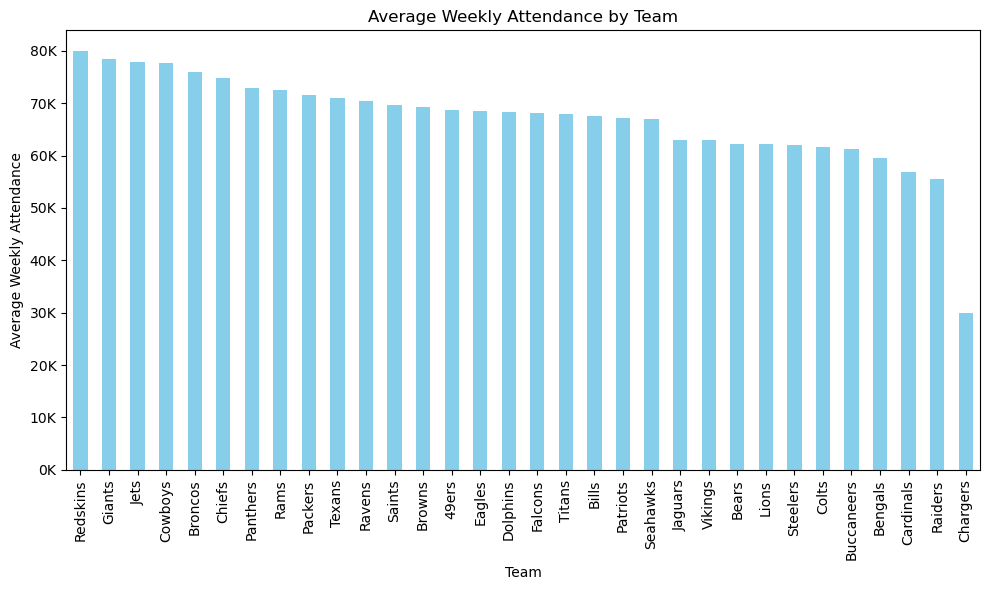

In [238]:
average_attendance = result.groupby('team_name')['weekly_attendance'].mean().sort_values(ascending=False)

# Generate the plot
plt.figure(figsize=(10, 6))
average_attendance.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Calculate the maximum attendance (sum of weekly attendance for each team)
max_attendance = average_attendance.max()
max_tick = ((max_attendance + 10000) // 10000) * 10000

# Generate tick values at 10k intervals up to the maximum attendance
tick_values = range(0, int(max_tick) + 10000, 10000)
plt.yticks(tick_values, [f'{x/1000:.0f}K' for x in tick_values])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

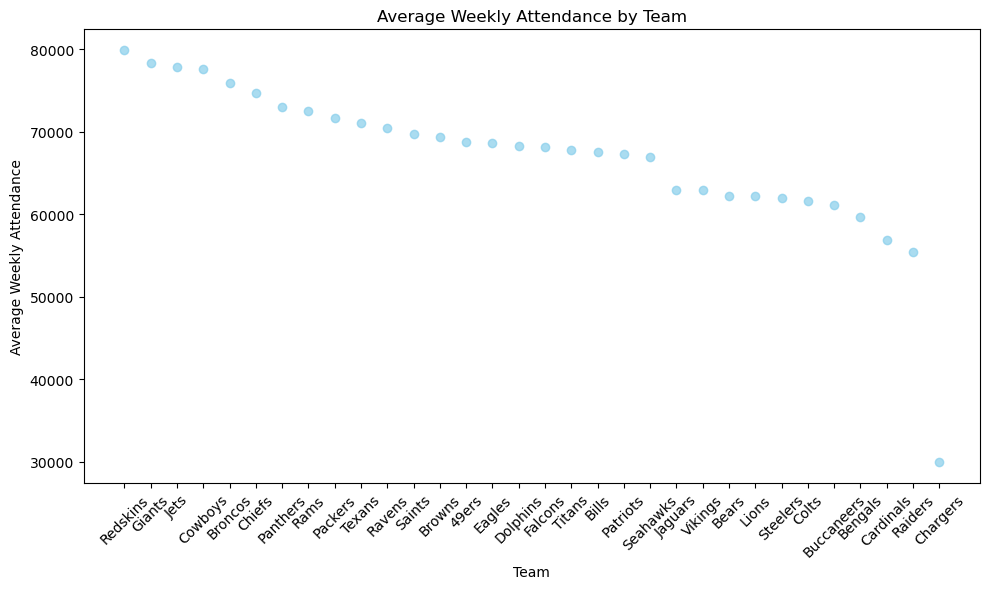

In [239]:
# Generate x and y values for the scatter plot
teams = average_attendance.index
average_attendances = average_attendance.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(teams, average_attendances, color='skyblue', alpha=0.7)

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [240]:
#Calculate the number of wins for each team
home_wins = result[result['home_score'] > result['away_score']]['home_team'].value_counts()
away_wins = result[result['away_score'] > result['home_score']]['away_team'].value_counts()

# Combine home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

print(total_wins)
print(sum(total_wins))

NE     233
PIT    200
IND    195
GB     192
PHI    188
BAL    186
NO     177
DEN    173
SEA    172
DAL    165
MIN    162
ATL    161
TEN    159
KC     158
NYG    155
CAR    153
CHI    153
NYJ    145
MIA    144
CIN    141
SF     140
TB     136
BUF    136
WAS    129
HOU    129
ARI    127
JAX    127
OAK    118
DET    114
CLE     98
LAC     83
LA      81
Name: count, dtype: int64
4830


In [241]:
result.nunique()

game_id              4840
season                 20
week                   17
gameday               851
weekday                 7
home_team              32
away_team              32
home_score             59
away_score             54
stadium                83
team                   30
team_name              32
weekly_attendance    3802
last_name              32
team_abbr              32
Team                   32
longitude              31
latitude               31
away_qb_name          250
home_qb_name          239
away_coach            136
home_coach            132
winning_team           34
home_team_win           2
dtype: int64

In [242]:
# Importing pandas library
import pandas as pd

# Assuming your DataFrame is named result
# Creating a new column 'stadium_name' that combines team abbreviation and 'Stadium' for each stadium name
result['stadium_name'] = result['team_abbr'] + ' Stadium'

# Renaming the stadium name for shared location of NYG/NYJ
result.loc[result['team_abbr'].isin(['NYG', 'NYJ']), 'stadium_name'] = 'NYG/NYJ Stadium'

# Dropping the original 'stadium' column
result.drop(columns=['stadium'], inplace=True)

# Displaying the updated DataFrame
print(result)


              game_id  season  week    gameday weekday home_team away_team  \
1     2000_01_TEN_BUF    2000     1 2000-09-03  Sunday       BUF       TEN   
2      2000_02_GB_BUF    2000     2 2000-09-10  Sunday       BUF        GB   
3     2000_05_IND_BUF    2000     5 2000-10-01  Sunday       BUF       IND   
4      2000_07_SD_BUF    2000     7 2000-10-15  Sunday       BUF       LAC   
5     2000_09_NYJ_BUF    2000     9 2000-10-29  Sunday       BUF       NYJ   
...               ...     ...   ...        ...     ...       ...       ...   
4850  2019_06_PIT_LAC    2019     6 2019-10-13  Sunday       LAC       PIT   
4851   2019_09_GB_LAC    2019     9 2019-11-03  Sunday       LAC        GB   
4852   2019_11_KC_LAC    2019    11 2019-11-18  Monday       LAC        KC   
4853  2019_15_MIN_LAC    2019    15 2019-12-15  Sunday       LAC       MIN   
4854  2019_16_OAK_LAC    2019    16 2019-12-22  Sunday       LAC       OAK   

      home_score  away_score         team  ...      Team   long

In [243]:
result

,game_id,season,week,gameday,weekday,home_team,away_team,home_score,away_score,team,...,Team,longitude,latitude,away_qb_name,home_qb_name,away_coach,home_coach,winning_team,home_team_win,stadium_name
1,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,BUF,TEN,16.0,13.0,Buffalo,...,Bills,-78.786978,42.773739,Steve McNair,Rob Johnson,Jeff Fisher,Wade Phillips,BUF,True,BUF Stadium
2,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,BUF,GB,27.0,18.0,Buffalo,...,Bills,-78.786978,42.773739,Brett Favre,Rob Johnson,Mike Sherman,Wade Phillips,BUF,True,BUF Stadium
3,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,BUF,IND,16.0,18.0,Buffalo,...,Bills,-78.786978,42.773739,Peyton Manning,Rob Johnson,Jim Mora,Wade Phillips,IND,False,BUF Stadium
4,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,BUF,LAC,27.0,24.0,Buffalo,...,Bills,-78.786978,42.773739,Jim Harbaugh,Rob Johnson,Mike Riley,Wade Phillips,BUF,True,BUF Stadium
5,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,BUF,NYJ,23.0,20.0,Buffalo,...,Bills,-78.786978,42.773739,Vinny Testaverde,Doug Flutie,Al Groh,Wade Phillips,BUF,True,BUF Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,2019_06_PIT_LAC,2019,6,2019-10-13,Sunday,LAC,PIT,17.0,24.0,Los Angeles,...,Chargers,-117.119525,32.783117,Devlin Hodges,Philip Rivers,Mike Tomlin,Anthony Lynn,PIT,False,LAC Stadium
4851,2019_09_GB_LAC,2019,9,2019-11-03,Sunday,LAC,GB,26.0,11.0,Los Angeles,...,Chargers,-117.119525,32.783117,Aaron Rodgers,Philip Rivers,Matt LaFleur,Anthony Lynn,LAC,True,LAC Stadium
4852,2019_11_KC_LAC,2019,11,2019-11-18,Monday,LAC,KC,17.0,24.0,Los Angeles,...,Chargers,-117.119525,32.783117,Patrick Mahomes,Philip Rivers,Andy Reid,Anthony Lynn,KC,False,LAC Stadium
4853,2019_15_MIN_LAC,2019,15,2019-12-15,Sunday,LAC,MIN,10.0,39.0,Los Angeles,...,Chargers,-117.119525,32.783117,Kirk Cousins,Philip Rivers,Mike Zimmer,Anthony Lynn,MIN,False,LAC Stadium


In [244]:
qb_wins = result[result['winning_team'] == result['home_team']]['home_qb_name'].value_counts()

In [245]:
qb_wins

home_qb_name
Tom Brady             121
Peyton Manning         89
Ben Roethlisberger     79
Drew Brees             72
Aaron Rodgers          68
                     ... 
Devlin Hodges           1
Cleo Lemon              1
Neil O'Donnell          1
Ty Detmer               1
Daniel Jones            1
Name: count, Length: 197, dtype: int64

In [246]:
qb_losses = result[result['winning_team'] != result['home_team']]['home_qb_name'].value_counts()

In [247]:
qb_losses

home_qb_name
Eli Manning         56
Jay Cutler          39
Carson Palmer       37
Drew Brees          36
Matthew Stafford    35
                    ..
Johnny Manziel       1
Taylor Heinicke      1
Lamar Jackson        1
Kellen Moore         1
Tyler Palko          1
Name: count, Length: 228, dtype: int64

In [248]:
qb_winning_percentage = (qb_wins / (qb_wins + qb_losses)) * 100
qb_winning_percentage.dtypes

dtype('float64')

game_id              0
season               0
week                 0
gameday              0
weekday              0
home_team            0
away_team            0
home_score           0
away_score           0
team                 0
team_name            0
weekly_attendance    0
last_name            0
team_abbr            0
Team                 0
longitude            0
latitude             0
away_qb_name         0
home_qb_name         0
away_coach           0
home_coach           0
winning_team         0
home_team_win        0
stadium_name         0
dtype: int64
                          QB_Winning_Percentage  Coach_Winning_Percentage  \
QB_Winning_Percentage                       1.0                       NaN   
Coach_Winning_Percentage                    NaN                       1.0   
Home_Team_Performance                       NaN                       NaN   

                          Home_Team_Performance  
QB_Winning_Percentage                       NaN  
Coach_Winning_Percentage  

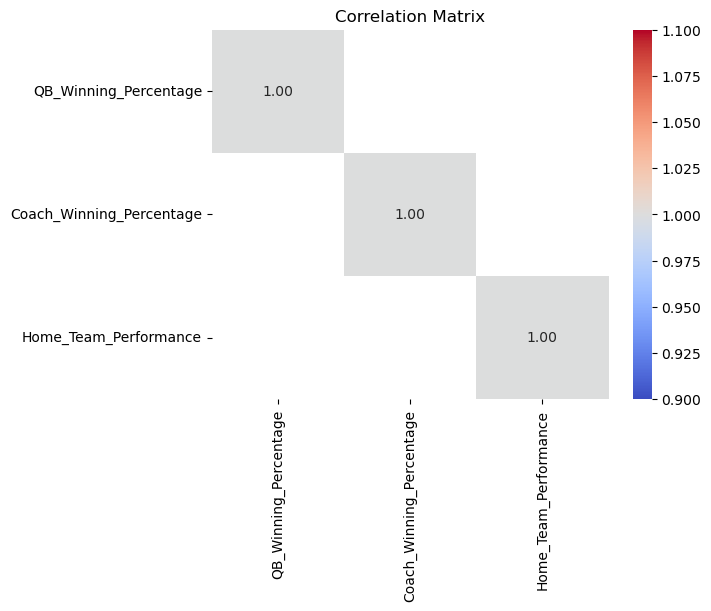

In [249]:
import pandas as pd

# Read the dataset


# 1. Data Preprocessing
# Check for missing values
print(result.isnull().sum())

# 2. Calculate Winning Percentage for QBs
qb_wins = result[result['winning_team'] == result['home_team']]['home_qb_name'].value_counts()
qb_losses = result[result['winning_team'] != result['home_team']]['home_qb_name'].value_counts()
qb_winning_percentage = (qb_wins / (qb_wins + qb_losses)) * 100

# Calculate Winning Percentage for Coaches
coach_wins = result[result['winning_team'] == result['home_team']]['home_coach'].value_counts()
coach_losses = result[result['winning_team'] != result['home_team']]['home_coach'].value_counts()
coach_winning_percentage = (coach_wins / (coach_wins + coach_losses)) * 100

# 3. Analyze Correlation
# For simplicity, let's just focus on the correlation between winning percentage and home team performance
# You can extend this analysis to include other factors if needed
home_team_performance = result[result['home_team_win'] == True]['home_team'].value_counts()

# Create a DataFrame with winning percentage, home team performance, and potentially other relevant factors
analysis_df = pd.DataFrame({
    'QB_Winning_Percentage': qb_winning_percentage,
    'Coach_Winning_Percentage': coach_winning_percentage,
    'Home_Team_Performance': home_team_performance
})

# Calculate correlation coefficients
correlation_matrix = analysis_df.corr()

# Print correlation matrix
print(correlation_matrix)

# 4. Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
